# Image classification using Convolutional Neural Networks

## Part 1 : Importing essential python libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import PIL
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.1'

## Part 2 : Data Pre-processing

### Pre-processing training set

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'Dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Pre-processing test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'Dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 3 : Building the Convolutional Neural Network Model

In [5]:
# Step 1 - Initializing the CNN as a sequence of layers
cnn = tf.keras.models.Sequential()

# Step 2 - Convolution Block
## Set 1 (Convolution + Max Pooling)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Set 2 (Convolution + Max Pooling)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Set 3 (Convolution + Max Pooling)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Artificial Neural Network
## Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

## Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

## Part 4 : Training the model

### Compiling model

In [6]:
cnn.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0, reduction="auto", name="binary_crossentropy"
), metrics = ['accuracy'])

### Training the model on training set and evaluating on the test set


In [7]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
250/250 [==============================] - 122s 488ms/step - loss: 0.6881 - accuracy: 0.5411 - val_loss: 0.6706 - val_accuracy: 0.5740
Epoch 2/30
250/250 [==============================] - 47s 190ms/step - loss: 0.6475 - accuracy: 0.6313 - val_loss: 0.6266 - val_accuracy: 0.6580
Epoch 3/30
250/250 [==============================] - 46s 183ms/step - loss: 0.6097 - accuracy: 0.6710 - val_loss: 0.5745 - val_accuracy: 0.7215
Epoch 4/30
250/250 [==============================] - 48s 194ms/step - loss: 0.5720 - accuracy: 0.6994 - val_loss: 0.5361 - val_accuracy: 0.7380
Epoch 5/30
250/250 [==============================] - 45s 182ms/step - loss: 0.5460 - accuracy: 0.7201 - val_loss: 0.5389 - val_accuracy: 0.7385
Epoch 6/30
250/250 [==============================] - 44s 175ms/step - loss: 0.5276 - accuracy: 0.7339 - val_loss: 0.4889 - val_accuracy: 0.7590
Epoch 7/30
250/250 [==============================] - 41s 163ms/step - loss: 0.5035 - accuracy: 0.7567 - val_loss: 0.4879 - val_a

## Part 5 : Visualizing Results

### Accuracy

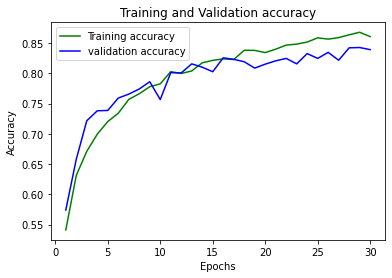

In [8]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Loss

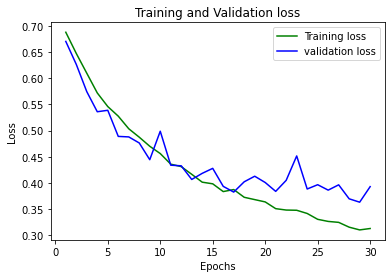

In [9]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 6 : Single prediction

In [36]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

### Dog

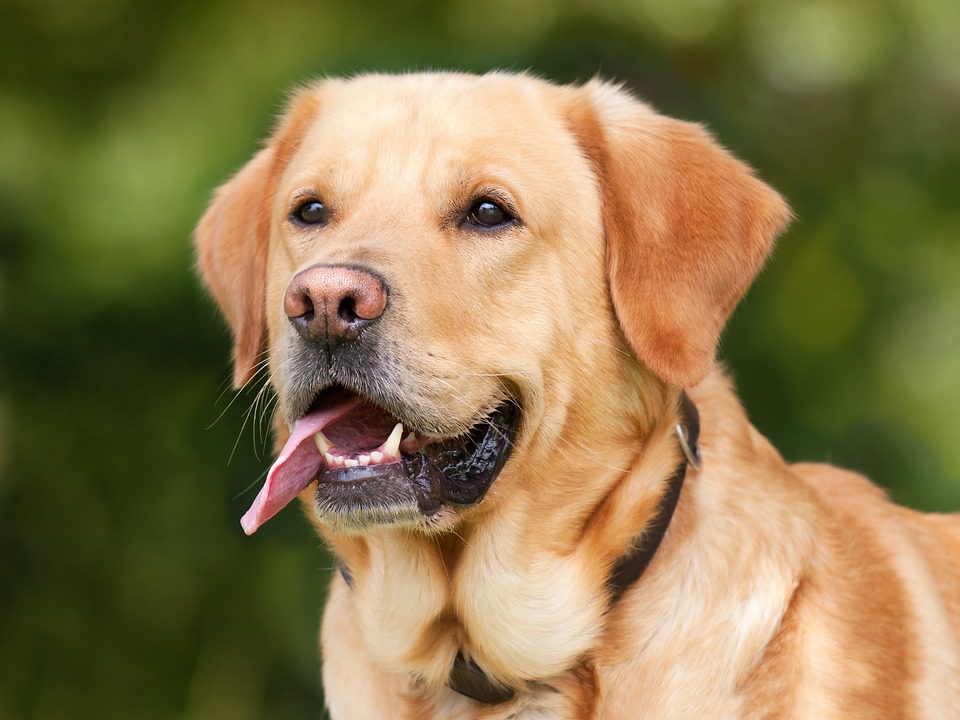

In [38]:
PIL.Image.open('Dataset/single_pred/cat_or_dog_1.jpg')

In [42]:
dog_image = image.load_img('Dataset/single_pred/cat_or_dog_1.jpg', target_size = (64, 64))
dog_image = image.img_to_array(dog_image)
dog_image = np.expand_dims(dog_image, axis = 0)
result = cnn.predict(dog_image)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

dog


### Cat

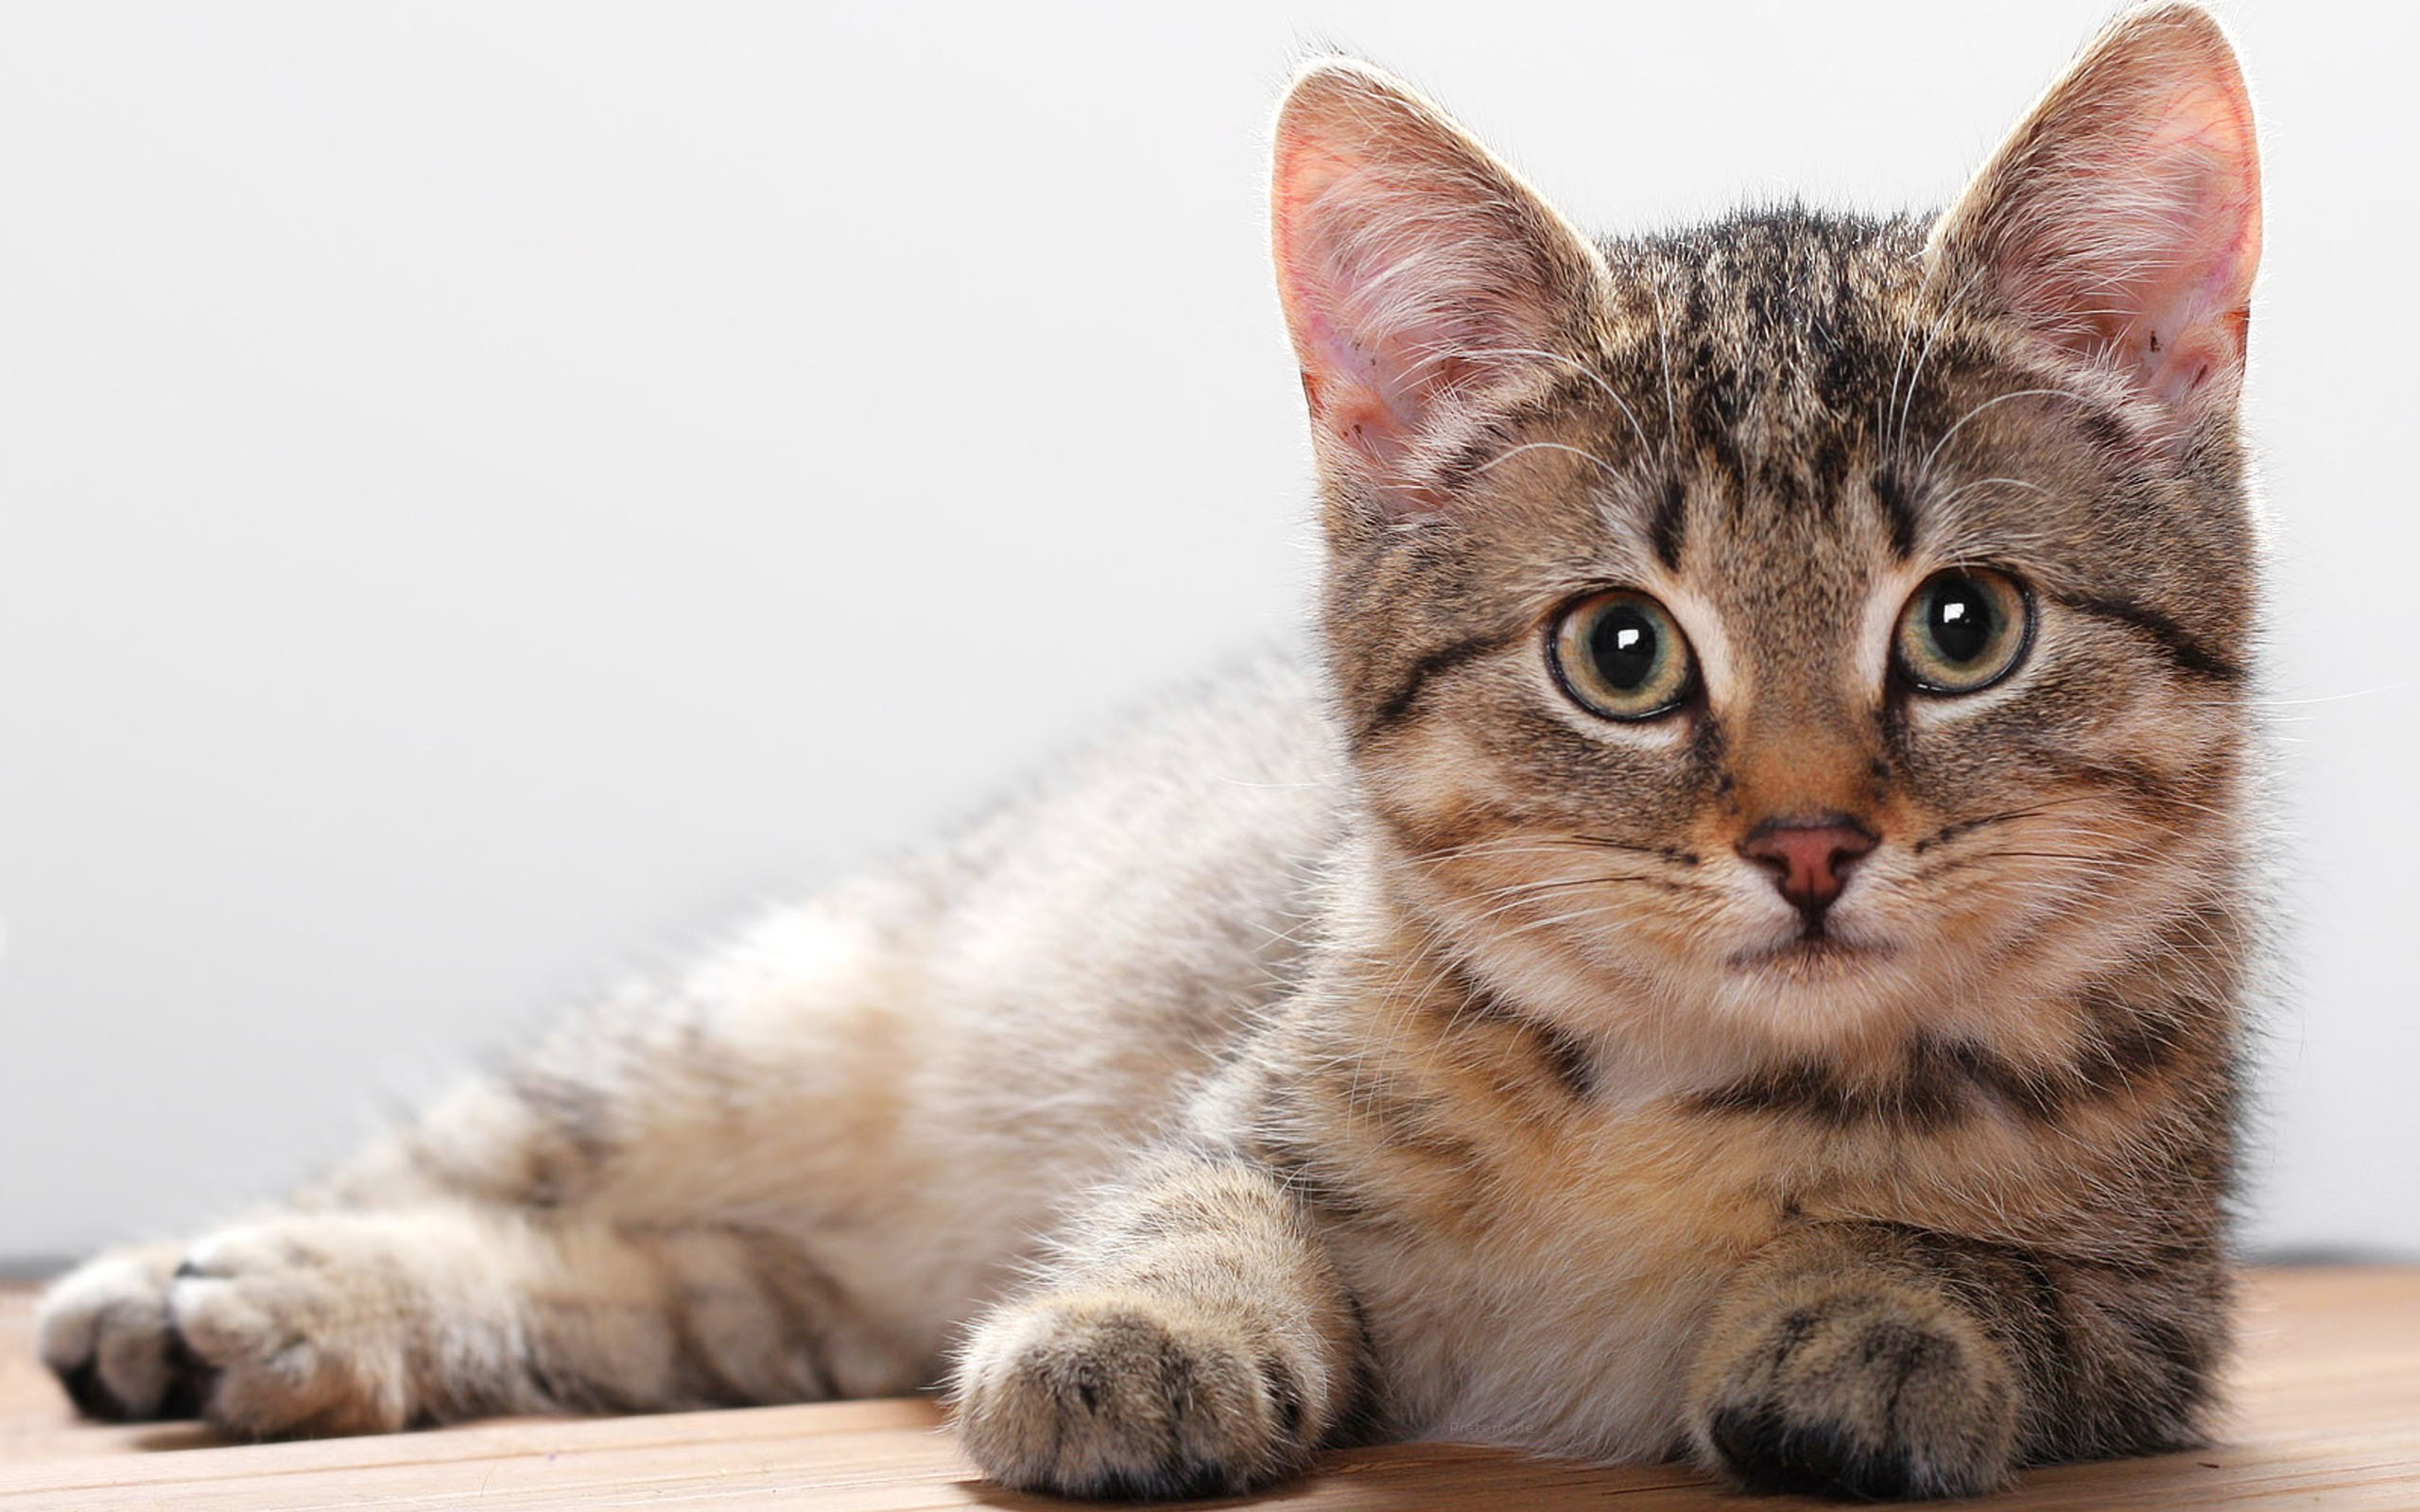

In [43]:
PIL.Image.open('Dataset/single_pred/cat_or_dog_2.jpg')

In [47]:
cat_image = image.load_img('Dataset/single_pred/cat_or_dog_2.jpg', target_size = (64, 64))
cat_image = image.img_to_array(cat_image)
cat_image = np.expand_dims(cat_image, axis = 0)
result = cnn.predict(cat_image)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

cat


## Part 7 : Saving and Loading the CNN model

In [48]:
cnn.save('model_1')

INFO:tensorflow:Assets written to: model_1\assets


In [49]:
classifier = load_model('model_1')

In [50]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

Exception in thread Thread-39:
Traceback (most recent call last):
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\server.py", line 306, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\server.py", line 298, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 403, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\tejas\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\tejas\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\server.py", 

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


Exception in thread Thread-42:
Traceback (most recent call last):
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\server.py", line 306, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\server.py", line 298, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 403, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\tejas\Anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\tejas\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\tejas\Anaconda3\lib\site-packages\anvil\server.py", 

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER
